In [430]:
import numpy as np
import pandas as pd
import sklearn.preprocessing as pp
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error as MSE
from sklearn.metrics import r2_score as r2s
from sklearn.model_selection import train_test_split

In [431]:
df = pd.read_csv('dataset.csv', delimiter=';', decimal=',')
df.head()

,Hour (Coded),Immobilized bus,Broken Truck,Vehicle excess,Accident victim,Running over,Fire vehicles,Occurrence involving freight,Incident involving dangerous freight,Lack of electricity,Fire,Point of flooding,Manifestations,Defect in the network of trolleybuses,Tree on the road,Semaphore off,Intermittent Semaphore,Slowness in traffic (%)
0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4.1
1,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,6.6
2,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,8.7
3,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,9.2
4,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,11.1


In [432]:
def label(x: int):
    # Seperating into labels.
    daytime = {0: 'Morning', 1: 'Noon', 2: 'Evening'}
    hours = {1: 0, 2: 0, 3: 0, 4: 0, 5: 0, 6: 0, 7: 0, 8: 0, 9: 0, 
             10: 1, 11: 1, 12: 1, 13: 1, 14: 1, 15: 1, 16: 1, 17: 1, 18: 1, 
             19: 2, 20 : 2, 21: 2, 22: 2, 23: 2, 24: 2, 25: 2, 26: 2, 27: 2}

    return daytime[hours[x]]

func = np.vectorize(label)
df['Hour (Coded)'] = df['Hour (Coded)'].apply(func)
df.head()

,Hour (Coded),Immobilized bus,Broken Truck,Vehicle excess,Accident victim,Running over,Fire vehicles,Occurrence involving freight,Incident involving dangerous freight,Lack of electricity,Fire,Point of flooding,Manifestations,Defect in the network of trolleybuses,Tree on the road,Semaphore off,Intermittent Semaphore,Slowness in traffic (%)
0,Morning,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4.1
1,Morning,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,6.6
2,Morning,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,8.7
3,Morning,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,9.2
4,Morning,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,11.1


In [433]:
new_df = pd.concat([pd.get_dummies(df['Hour (Coded)']), df.iloc[:, 1:]], axis=1)
new_df.head()

,Evening,Morning,Noon,Immobilized bus,Broken Truck,Vehicle excess,Accident victim,Running over,Fire vehicles,Occurrence involving freight,Incident involving dangerous freight,Lack of electricity,Fire,Point of flooding,Manifestations,Defect in the network of trolleybuses,Tree on the road,Semaphore off,Intermittent Semaphore,Slowness in traffic (%)
0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4.1
1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,6.6
2,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,8.7
3,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,9.2
4,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,11.1


In [434]:
normalizer = pp.MinMaxScaler()
dt = new_df
for column in new_df.columns:
    dt[column] = normalizer.fit_transform(np.array(new_df[column]).reshape(-1,1))
dt.head()

,Evening,Morning,Noon,Immobilized bus,Broken Truck,Vehicle excess,Accident victim,Running over,Fire vehicles,Occurrence involving freight,Incident involving dangerous freight,Lack of electricity,Fire,Point of flooding,Manifestations,Defect in the network of trolleybuses,Tree on the road,Semaphore off,Intermittent Semaphore,Slowness in traffic (%)
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.035
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.160
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.265
3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.290
4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.385


In [435]:
# Seperating part of dt into training data
X, y = np.array(dt.iloc[:, :-1]), np.array(dt.iloc[:, -1])
# Seperating part of dt into test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [436]:
# Linear Regression model implementation
lmod = LinearRegression()
lmod.fit(X_train, y_train)

LinearRegression()

In [437]:
# Poly Regression model implmenetation
regress = LinearRegression()
pmod = pp.PolynomialFeatures(degree=2, include_bias=False)
poly = pmod.fit_transform(X)
pmod.fit(poly, y)
regress.fit(poly, y)

LinearRegression()

In [438]:
y_lpred = lmod.predict(X_test)
y_ppred = regress.predict(pmod.fit_transform(X_test))

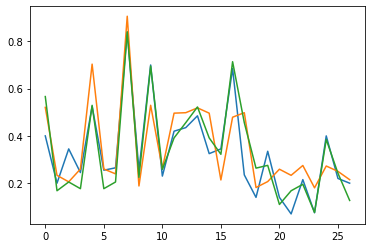

In [445]:
# Damn, that looks Something Like the Test data
plt.plot(y_test, label='Actual')
plt.plot(y_lpred, label='Predicted by Linear Regression')
plt.plot(y_ppred, label='Predicted by Polynomial Regression')
plt.show()

In [440]:
print(f"Mean Squared Error for Linear Regression on data: {MSE(y_test, y_lpred):.4f}")
print(f"R2-Score for Linear Regression on data: {r2s(y_test, y_lpred):.4f}")
print(f"Mean Squared Error for Polynomial Regression on data: {MSE(y_test, y_ppred):.4f}")
print(f"R2-Score for Polynomial Regression on data: {r2s(y_test, y_ppred):.4f}")

Mean Squared Error for Linear Regression on data: 0.0136
R2-Score for Linear Regression on data: 0.6012
Mean Squared Error for Polynomial Regression on data: 0.0058
R2-Score for Polynomial Regression on data: 0.8288


In [441]:
# FOR FUN: Correlation
print(f"Correlation coefficient between test data and linear prediction: {np.corrcoef(y_test, y_lpred)[0][1]:.4f}")
print(f"Correlation coefficient between test data and polynomial prediction: {np.corrcoef(y_test, y_ppred)[0][1]:.4f}")

Correlation coefficient between test data and linear prediction: 0.8038
Correlation coefficient between test data and polynomial prediction: 0.9224


Metrics are better across the board for the polynomial regressor.